## CV

In [ ]:
import cv2
import numpy


def gaussian_heatmap(sigma: int, spread: int):
    extent = int(spread * sigma)
    center = spread * sigma / 2
    heatmap = numpy.zeros([extent, extent], dtype=numpy.float32)
    for i_ in range(extent):
        for j_ in range(extent):
            heatmap[i_, j_] = 1 / 2 / numpy.pi / (sigma ** 2) * numpy.exp(
                -1 / 2 * ((i_ - center - 0.5) ** 2 + (j_ - center - 0.5) ** 2) / (sigma ** 2))
    heatmap = (heatmap / numpy.max(heatmap) * 255).astype(numpy.uint8)
    return heatmap


hm = gaussian_heatmap(sigma=10, spread=3)

hm = cv2.applyColorMap(hm, cv2.COLORMAP_JET)
cv2.imshow("hm", hm)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
from math import exp

# Probability as a function of distance from the center derived
# from a gaussian distribution with mean = 0 and stdv = 1
scaledGaussian = lambda x : exp(-(1/2)*(x**2))


imgSize = 512
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

for i in range(imgSize):
  for j in range(imgSize):

    # find euclidian distance from center of image (imgSize/2,imgSize/2) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5

    distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
    distanceFromCenter = 2.5*distanceFromCenter/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage, 
                                                  cv2.COLORMAP_JET)

## PCA

In [135]:
import numpy as np
from sklearn.decomposition import PCA

# สมมติว่า X คือเมทริกซ์ข้อมูลของเรา
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("ผลลัพธ์จาก PCA:")
print(X_pca)

ผลลัพธ์จาก PCA:
[[ 5.19615242e+00  6.24556048e-17]
 [-0.00000000e+00 -0.00000000e+00]
 [-5.19615242e+00  6.24556048e-17]]


### scree plot

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#define URL where dataset is located
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv"

#read in data
data = pd.read_csv(url)

#define columns to use for PCA
df = data.iloc[:, 1:5]

#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=df.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [54]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

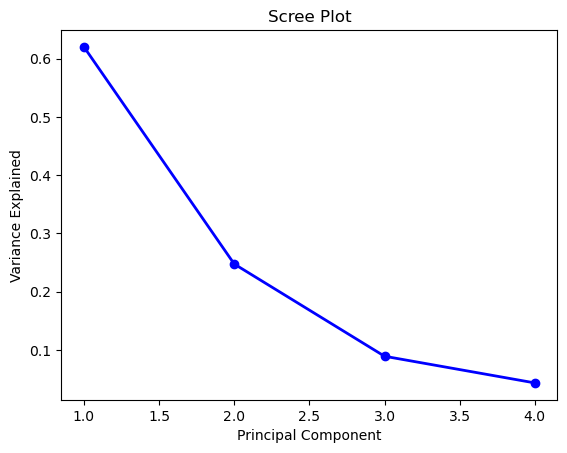

In [56]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## SVD

In [ ]:
import numpy as np

# สมมติว่า A คือเมทริกซ์ข้อมูลของเรา
A = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

# คำนวณ SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# เลือก k ค่าเอกฐานแรก (ในที่นี้ k = 2)
k = 2
U_k = U[:, :k]
s_k = np.diag(s[:k])
Vt_k = Vt[:k, :]

In [ ]:
# สร้างเมทริกซ์ที่มีมิติลดลง
A_reduced = U_k @ s_k @ Vt_k

print("เมทริกซ์ที่มีมิติลดลง:")
print(A_reduced)

เมทริกซ์ที่มีมิติลดลง:
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]


In [131]:
U, s , Vt, U.shape, s.shape, Vt.shape

(array([[-0.19101157, -0.89266338,  0.40824829],
        [-0.51371859, -0.26348917, -0.81649658],
        [-0.8364256 ,  0.36568503,  0.40824829]]),
 array([9.69657342e+01, 7.25578339e+00, 1.48879510e-15]),
 array([[-0.24139304, -0.25728686, -0.27318068, -0.2890745 , -0.30496832,
         -0.32086214, -0.33675595, -0.35264977, -0.36854359, -0.38443741],
        [ 0.53589546,  0.42695236,  0.31800926,  0.20906617,  0.10012307,
         -0.00882003, -0.11776313, -0.22670623, -0.33564933, -0.44459242],
        [ 0.09975293, -0.01037753,  0.23987452,  0.05273845,  0.0996209 ,
         -0.46517509, -0.52300449, -0.23591804,  0.593137  ,  0.14935136]]),
 (3, 3),
 (3,),
 (3, 10))

In [133]:
U_k, s_k, Vt_k, U_k.shape, s_k.shape, Vt_k.shape

(array([[-0.19101157, -0.89266338],
        [-0.51371859, -0.26348917],
        [-0.8364256 ,  0.36568503]]),
 array([[96.96573419,  0.        ],
        [ 0.        ,  7.25578339]]),
 array([[-0.24139304, -0.25728686, -0.27318068, -0.2890745 , -0.30496832,
         -0.32086214, -0.33675595, -0.35264977, -0.36854359, -0.38443741],
        [ 0.53589546,  0.42695236,  0.31800926,  0.20906617,  0.10012307,
         -0.00882003, -0.11776313, -0.22670623, -0.33564933, -0.44459242]]),
 (3, 2),
 (2, 2),
 (2, 10))